In [1]:
from utils import *
from probabilistic_models import *

## Loading Datasets

In [2]:
df_1 = pd.read_excel(r"D:\Study\Python\Projects\Paul Project\vendor1.xlsx")
df_2 = pd.read_excel(r"D:\Study\Python\Projects\Paul Project\vendor2.xlsx")

In [3]:
data = pd.concat([df_1, df_2], ignore_index=True)
df,df_dict = df_processor(data)

In [4]:
X_values = df['Inverse_Temp'].values
Y_values = df['Mpa'].values

## Weibull Model

In [5]:
weibull = WeibullModel(X_values, Y_values)
weibull.intercept,weibull.slope, weibull.shape

(5.89755456074455, 0.02332859854794873, 25.755298576718157)

## LogNormal Model

In [6]:
lognormal = LognormalModel(X_values, Y_values)
lognormal.k, lognormal.m, lognormal.sigma

(5.859842293281658, 0.024157582221448693, 0.03864222350319222)

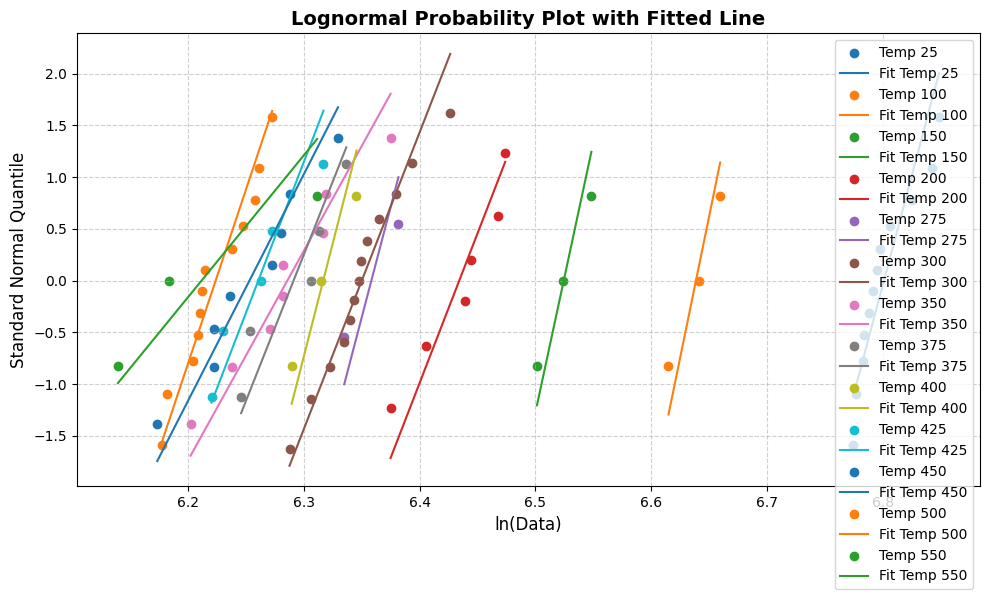

In [7]:
plt.figure(figsize=(10, 6))

for temp in df_dict.keys():
    data = df_dict[temp]["Mpa"].values
    data = np.sort(data)

    sigma_values, ln_sigma_values,sigma_fit_log, y_fit = lognormal.transform(data)

    plt.scatter(sigma_values, ln_sigma_values, label=f"Temp {temp}")
    plt.plot(sigma_fit_log, y_fit, linestyle='-', label=f"Fit Temp {temp}")

plt.title("Lognormal Probability Plot with Fitted Line", fontsize=14, fontweight="bold")
plt.xlabel("ln(Data)", fontsize=12)
plt.ylabel("Standard Normal Quantile", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

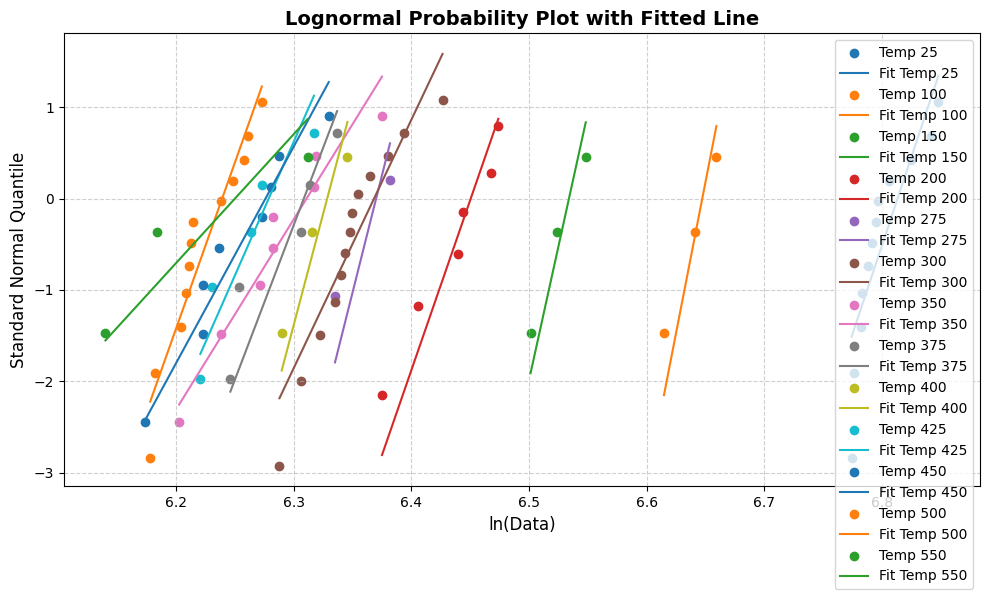

In [15]:
plt.figure(figsize=(10, 6))

for temp in df_dict.keys():
    data = df_dict[temp]["Mpa"].values
    data = np.sort(data)

    sigma_values, ln_sigma_values,sigma_fit_log, y_fit = weibull.transform(data)

    plt.scatter(sigma_values, ln_sigma_values, label=f"Temp {temp}")
    plt.plot(sigma_fit_log, y_fit, linestyle='-', label=f"Fit Temp {temp}")

plt.title("Lognormal Probability Plot with Fitted Line", fontsize=14, fontweight="bold")
plt.xlabel("ln(Data)", fontsize=12)
plt.ylabel("Standard Normal Quantile", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# def plot_different_cdf(df_4,cdf,u,w, df,name, cdf_formula, model_name):
def plot_different_cdf(model,data_frames, cdf_values,name, cdf_formula, model_name):
    temperature_values = np.linspace(10, 600, 100)

    fig, ax = plt.subplots(figsize=(8,6))

    # for (name,df) in selected_files.items():
    #     ax.scatter(df["Temperature"], df["YS"], edgecolors='black', alpha=0.7, s=30, label=f"{name}")

    if st.checkbox(f"✔️ Show Different CDF values", value=True, key=f"{model_name}_cdf_check"):
        for i in range(len(cdf)):
            ys_predicted_cdf = cdf_formula(temperature_values, shape, u, w, cdf[i])
            ax.plot(temperature_values, ys_predicted_cdf, linestyle="-", linewidth=1, label=f"Predicted YS (CDF={cdf[i]})")

    var_cdf = st.slider("Select CDF value", min_value=0.01, max_value=0.99, value=0.5, step=0.01, key=f"{model_name}_slider")
    ys_predicted_cdf = cdf_formula(temperature_values, shape, u, w, var_cdf)
    ax.plot(temperature_values, ys_predicted_cdf, linestyle="-", linewidth=2, label=f"Predicted YS (Selected CDF={var_cdf})")

    ax.set_xlabel("Temperature (°C)", fontsize=12, fontweight="bold")
    ax.set_ylabel("Yield Stress (YS)", fontsize=12, fontweight="bold")
    ax.set_title("Yield Stress vs. Temperature Comparison", fontsize=14, fontweight="bold")
    ax.legend()
    st.pyplot(fig)